In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
from mnist import MNIST
mndata = MNIST('./data')
images, labels = mndata.load_training()
images = np.array(images)
images = images.astype("float32") / 255
labels = np.eye(10)[labels]

[n,m] = images.shape

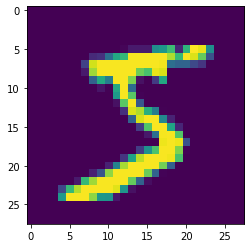

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [3]:
plt.imshow(images[0].reshape(28,28))
plt.show()
print(labels[0])

In [15]:
itter = 5
hidden_layers = np.arange(1,200,5)
times = len(hidden_layers)
data = np.zeros((times,itter+2))
for layers, j in zip(hidden_layers,range(times)):
    # weights of hiden layer
    w_h = np.random.uniform(-0.5, 0.5, (layers, 784))
    # weights of output layer
    w_o =  np.random.uniform(-0.5, 0.5, (10, layers))
    # bias of hiden layer
    b_h = np.zeros((layers, 1))
    # bias of output layer
    b_o = np.zeros((10, 1))

    learn_rate = 0.01
    nr_correct = 0
    
    for i in range(itter):
        for N in range(n):
            start_time = time.time()
            
            img = np.array(images[N],ndmin=2)
            l = np.array(labels[N],ndmin=2)
            l = np.transpose(l)
            
            # Hidden
            y_tmp = w_h @ np.transpose(img)+ b_h
            y = 1 / (1 + np.exp(-y_tmp))

            # Output
            o_tmp = w_o @ y + b_o
            o = 1 / (1 + np.exp(-o_tmp))

            #Error
            e = 1/len(o)*np.sum((o-l)**2)
            nr_correct += int(np.argmax(o)==np.argmax(l))

            # Backpropagation
            delta_o = o-l
            w_o += -learn_rate * delta_o @ np.transpose(y)
            b_o += -learn_rate * delta_o

            delta_h = np.transpose(w_o)@delta_o*y*(1-y)
            w_h += -learn_rate * delta_h @ img
            b_h += -learn_rate * delta_h

    # Show accuracy for this epoch
        acc = round((nr_correct / images.shape[0]) * 100, 2)
        data[j,0] = layers
        data[j,i+2] = acc
        end_time = time.time()
        nr_correct = 0
    data[j,1] = end_time - start_time
    print(j,'/',times,end='\r')
print(data)

[[1.00000000e+00 5.24520874e-05 1.02700000e+01 2.10100000e+01
  2.24800000e+01 2.28800000e+01 2.31900000e+01]
 [6.00000000e+00 6.07967377e-05 7.55900000e+01 8.64200000e+01
  8.77000000e+01 8.82800000e+01 8.87700000e+01]
 [1.10000000e+01 6.77108765e-05 8.13700000e+01 9.05000000e+01
  9.14500000e+01 9.20000000e+01 9.23800000e+01]
 [1.60000000e+01 2.37226486e-04 8.44100000e+01 9.17500000e+01
  9.27300000e+01 9.32600000e+01 9.36800000e+01]
 [2.10000000e+01 2.60829926e-04 8.59800000e+01 9.24100000e+01
  9.35300000e+01 9.41900000e+01 9.46500000e+01]
 [2.60000000e+01 2.80618668e-04 8.63300000e+01 9.26100000e+01
  9.38200000e+01 9.45500000e+01 9.50200000e+01]
 [3.10000000e+01 3.03030014e-04 8.69200000e+01 9.29300000e+01
  9.42100000e+01 9.48900000e+01 9.53200000e+01]
 [3.60000000e+01 3.32117081e-04 8.79800000e+01 9.32400000e+01
  9.44100000e+01 9.50700000e+01 9.55000000e+01]
 [4.10000000e+01 3.47852707e-04 8.79300000e+01 9.35600000e+01
  9.47600000e+01 9.55300000e+01 9.60300000e+01]
 [4.600000

In [1]:
np.savetxt("foo.csv", data, delimiter=",")

NameError: name 'np' is not defined

In [ ]:
"""
img = np.array([0,0.2,0.62,1,0.62],ndmin=2)
wh  = np.array([[0.05,0.22,0.1,0.04,-0.08],
        [0.15,-0.06,0.39,0.46,-0.12],
        [0.29,0.03,0.07,0.43,-0.43],
        [0.41,0.48,0.33,8.66,0.37]])

bh  = np.zeros((4,1))
wo  = np.array([[0.48,0.3,-0.04,0.28],
        [-0.38,0.14,-0.36,0.44],
        [0.02,-0.09,-0.24,0.27]])
bo = np.zeros((3,1))
"""